In [1]:
# from __future__ import print_function
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
import time
import sys
import copy
#Quick fudge to make import from ../Scripts work
import sys
sys.path.append('/Users/floorbroekgaarden/Projects/BHNS_project/Scripts')
import string

import ClassCosmicIntegrator  as CI #Given settings and redshifts returns rates (2D arrays) Loads the data
import coencodeVarious        as CV
from PostProcessingScripts import * 
from ClassFormationChannels_5mainchannels import * 


import pandas as pd


from astropy import units as u
from astropy import constants as const


In [2]:

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
# def plotdesigndistributionModels(axe=None, dfkey='mass1', BPSmodelNames=['A'], MSSFRmodelNames=['000'], DCOtype='BHNS', xvarrange=None, xlabel='xlabel', ylabel='ylabel', \
#                               xlim=[1,30], ylim=[0,1.05], indplot=0, whichWeight='det', whichPlot='cdf', whichBPScolor=['A'], whichMSSFRcolor=['000']): 
#     """ 
#     plot total mass distribution with channels 
#     input:
    
#     axe = the axis to plot it on
#     xvar= the array of data that you want to plot the kde of
#     bw_method = bandwith method of the kernel density function you want to use (see class gaussian_kde())
#     xvarrange, the x-axis range to use for the kde [should be typically slightly larger than the range of xvar]
#     xlabel, ylabel = x and y labels of the plot
#     xlim, ylim = xlim and ylim of the plot axis 
#     indplot = something I use to hack the legend labels (I only want to plot the legends for some subplots)
#     whichWeight = 'intrinsic' 'observed'
#     you can just put indplot=0 or indplot=1 to get labels or no labels resp. 
#     """
    
# #     BPScolors = sns.color_palette("husl", len(xvarDCO)) 
#     BPScolors = ['crimson', 'purple', 'mediumblue', 'cyan', 'teal', 'lime', 'gold', 'darkorange', 'orangered', 'red']
#     lw = 3.5
    
#     BPScolors       = sns.color_palette("husl", len(BPSmodelNames))
#     MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
 
    
#     if DCOtype=='BHNS':
#         DCOname='BHNS'
#     elif DCOtype=='BBH':
#         DCOname='BHBH'
#     elif DCOtype=='BNS':
#         DCOname='NSNS'


    
#     # path for files 
#     path_dir = '/Volumes/Andromeda/DATA/AllDCO_bugfix/'
#     nModels=15
#     BPSnameslist = list(string.ascii_uppercase)[0:nModels]
#     modelDirList = ['fiducial', 'massTransferEfficiencyFixed_0_25', 'massTransferEfficiencyFixed_0_5', 'massTransferEfficiencyFixed_0_75', \
#                    'unstableCaseBB', 'alpha0_5', 'alpha2_0', 'fiducial', 'rapid', 'maxNSmass2_0', 'maxNSmass3_0', 'noPISN',  'ccSNkick_100km_s', 'ccSNkick_30km_s', 'noBHkick' ]

#     alphabetDirDict =  {BPSnameslist[i]: modelDirList[i] for i in range(len(BPSnameslist))}



# 	#####




 
    
    
    
    
    
#     for ind_m, BPSmodelName in enumerate(BPSmodelNames):
#             if ind_m%15==0:
#                 print('now at m=', BPSmodelName)
#             # read in model
            
            
#             path_ = path_dir + alphabetDirDict[BPSmodelName] +'/'
#             path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'   
            
#             fdata = h5.File(path)
# #             df = pd.read_csv('CompactData_model_' + BPSmodelName + '_' + DCOtype + '.csv', header=[0], skiprows=[1])
            
#             if dfkey in ['q', 'mchirp', 'mtot', 'massBH', 'massNS']:
            
#                 # obtain BH and NS masses
#                 xvar1 = fdata['doubleCompactObjects']['M1'][...].squeeze()
#                 xvar2 = fdata['doubleCompactObjects']['M2'][...].squeeze()
# #                 xvar1 = df['mass1']
# #                 xvar2 = df['mass2']
#                 M1, M2 = obtainM1BHandM2BHassymetric(m1=xvar1, m2=xvar2) # M1 will be the most massive, M2 the least massive compact object. 
#                 if dfkey =='mtot':
#                     xvar=M1+M2
#                 elif dfkey=='massBH':
#                     xvar = M1
#                 elif dfkey=='massNS':
#                     xvar = M2                
#                 elif dfkey =='q':
#                     xvar = M1/M2
#                 elif dfkey=='mchirp':
#                     xvar = chirpmass(M1,M2)
#                 else:
#                     print('KeyError')
#                 del M1
#                 del M2
#                 del xvar1
#                 del xvar2
                
#             else:
#                 xvar = df[dfkey]
            
# #             if dfkey=='tc':
# #                 xvar = xvar/1000 # convert to Gyr 
            
#             label = None
            
#             if BPSmodelName in whichBPScolor:
#                 BPScolor = BPScolors[ind_m]
#             else:
#                 BPScolor = 'gray'
            
            
            
            
            
#             ii=0
#             for ind_mssfr, mssfr in enumerate(MSSFRmodelNames):
#                 # read in MSSFR weights: 
#                 if whichWeight=='det':
#                     # get detected weights
#                     fparam_key = 'weights_detected'
# #                     dfkey_w = mssfr+'_R_det'
#                 elif whichWeight=='z0':
#                     # get intrinsic weights
#                     fparam_key = 'weights_intrinsic'
# #                     dfkey_w = mssfr+'_R_z0'

#                 weightheader = 'w_' + mssfr
#                 w = fdata[fparam_key][weightheader][...].squeeze()
# #                 w = df[dfkey_w]
                

#                 if mssfr in whichMSSFRcolor:

#                     if mssfr=='000':
#                         MSSFRzorder = 100
#                         MSSFRlinestyle = MSSFRlinestyles[0]
#                         MSSFRalpha=1
#                     elif mssfr=='231':
#                         MSSFRzorder=50
#                         MSSFRlinestyle = MSSFRlinestyles[1]
#                         MSSFRalpha=1
#                     elif mssfr=='312':
#                         MSSFRzorder=51
#                         MSSFRlinestyle = MSSFRlinestyles[2]
#                         MSSFRalpha=1                    
#                 else:
#                     BPScolor = BPScolors[ind_m] #'gray' 
#                     MSSFRalpha=0.3
#                     MSSFRlinestyle = '-'
#                     MSSFRzorder=10

#                 # make the plot 
#                 if whichPlot=='cdf':
#                     axe.hist(xvar, density=True, bins=len(xvar), cumulative=True,
#                              histtype='step', alpha=MSSFRalpha, color=BPScolor, label=None,\
#                              linewidth=2, linestyle=MSSFRlinestyle, zorder=MSSFRzorder, weights=w)
#                     ii+=1
                        
                     
        
#     # MAKE CDF background
# #     y_quantiles = np.linspace(0.1,1,10)
# #     x_quantiles = np.linspace(xlim[0], xlim[1], 10)
# #     yy_0 = np.zeros_like(x_quantiles)

# #     # COLOR MAP 
# #     cm       = plt.get_cmap('Greys')
# #     Nc = 10
# #     greys = [cm(x) for x in np.linspace(0,1 , int(1.5*Nc))]  # I dont want the dark colors
    
# #     ii = 0
# #     for ind in range(Nc):
# #         ii +=0.10
# #         yy_q = np.ones_like(yy_0) * ii 
# #         axe.fill_between(x_quantiles, yy_0, yy_q, facecolor=greys[ind], \
# #                          alpha=1, zorder=1)#,\  
# #         textt_q = r'$\,$' + str(np.round(ii*100., 1))  +'\%'
# # #         axe.text(xlim[1], ii, s=textt_q, rotation = 0, \
# # #                  fontsize = fs-10, color ='k', ha = 'left', va='center')#, weight = 'bold')
# #         yy_0 = yy_q 

  
#     del xvar
#     del w
#     ###########
#     if xlim:
#         axe.set_xlim(xlim[0], xlim[1])
#     if ylim:
#         axe.set_ylim(ylim[0], ylim[1])
        

#     axe == CV.layoutAxes(axe, nameX=xlabel, nameY=ylabel)
    

    
#     if indplot==0: 
#         handles, labels = axe.get_legend_handles_labels()
#     else:
#         handles, labels = None, None
        
# #     axe.grid(True)
    
    
#     return handles, labels
    

In [4]:
MSSFRnameslist = []
MSSFRnameslist.append('000') # add phenomenological 

for ind_GSMF, GSMF in enumerate(GSMFs):
    ind_y = ind_GSMF + 1
    for ind_MZ, MZ in enumerate(MZs):
        ind_z = ind_MZ +1
        for ind_SFR, SFR in enumerate(SFRs):
            ind_x = ind_SFR+1
            
            
            
            
        

            MSSFRnameslist.append('%s%s%s'%(ind_x, ind_y, ind_z))

print(MSSFRnameslist)

['000', '111', '211', '311', '112', '212', '312', '113', '213', '313', '121', '221', '321', '122', '222', '322', '123', '223', '323', '131', '231', '331', '132', '232', '332', '133', '233', '333']


In [20]:
print(MSSFRnameslist)




MSSFRnameslistWantedOrder = []
MSSFRnameslistWantedOrder.append('000') # add phenomenological 

for ind_GSMF, GSMF in enumerate([0,1,2]):
    ind_x = ind_GSMF + 1
    for ind_MZ, MZ in enumerate([0,1,2]):
        ind_y = ind_MZ +1
        for ind_SFR, SFR in enumerate([0,1,2]):
            ind_z = ind_SFR+1
            
            
            
            
        

            MSSFRnameslistWantedOrder.append('%s%s%s'%(ind_x, ind_y, ind_z))
            
            
print(MSSFRnameslistWantedOrder)


indexlist = np.asarray(range(28))
print(indexlist)
indexOrderedToOldMSSFR = []
for mssfr in MSSFRnameslistWantedOrder:
    mask = (np.asarray(MSSFRnameslist)==mssfr)
    ind_map = indexlist[mask]
    indexOrderedToOldMSSFR.append(int(ind_map[...].squeeze()))
    
    
print(indexOrderedToOldMSSFR)



dictOldmssfrINDtoNEWmssfrIND = {MSSFRnameslist[i]: indexOrderedToOldMSSFR[i] for i in range(len(MSSFRnameslist))}



print(dictOldmssfrINDtoNEWmssfrIND['321'])

['000', '111', '211', '311', '112', '212', '312', '113', '213', '313', '121', '221', '321', '122', '222', '322', '123', '223', '323', '131', '231', '331', '132', '232', '332', '133', '233', '333']
['000', '111', '112', '113', '121', '122', '123', '131', '132', '133', '211', '212', '213', '221', '222', '223', '231', '232', '233', '311', '312', '313', '321', '322', '323', '331', '332', '333']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]
[0, 1, 4, 7, 10, 13, 16, 19, 22, 25, 2, 5, 8, 11, 14, 17, 20, 23, 26, 3, 6, 9, 12, 15, 18, 21, 24, 27]
8


In [13]:
def tfZ(Z):
    Zsolar=0.0142
    logZ = np.log10(Z) # /Zsolar
    return logZ
import seaborn as sns

In [14]:
nModels=15
BPSnameslist = list(string.ascii_uppercase)[0:nModels]
modelDirList = ['fiducial', 'massTransferEfficiencyFixed_0_25', 'massTransferEfficiencyFixed_0_5', 'massTransferEfficiencyFixed_0_75', \
               'unstableCaseBB', 'alpha0_5', 'alpha2_0', 'fiducial', 'rapid', 'maxNSmass2_0', 'maxNSmass3_0', 'noPISN',  'ccSNkick_100km_s', 'ccSNkick_30km_s', 'noBHkick' ]

alphabetDirDict =  {BPSnameslist[i]: modelDirList[i] for i in range(len(BPSnameslist))}


physicalNamesBPSmodels = [r'\textbf{fiducial}',\
                           r'$\beta=0.25$', r'$\beta=0.5$',  r'$\beta=0.75$',r'\textbf{unstable case BB}',\
                           r'$\alpha_{\rm{CE}}=0.5$',  r'$\alpha_{\rm{CE}}=2$', r'\textbf{optimistic CE}',\
                          r'\textbf{rapid SN}', r'$\rm{max} \ m_{\rm{NS}}=2.0\,\rm{M}_{\odot}$', r'$\rm{max} \ m_{\rm{NS}}=3.0\,\rm{M}_{\odot}$',\
                          r'\textbf{no PISN}', r'\textbf{SN} '+ r'$\sigma_{\rm{rms}}^{\rm{1D}}=100\,\rm{km}\,\rm{s}^{-1}$',r'\textbf{SN} '+ r'$\sigma_{\rm{rms}}^{\rm{1D}}=30\,\rm{km}\,\rm{s}^{-1}$',\
                          r'\textbf{SN} '+ r'$v_{\rm{k,BH}}=0\,\rm{km}\,\rm{s}^{-1}$' ]



alphabetPhysicalNameDict =  {BPSnameslist[i]: physicalNamesBPSmodels[i] for i in range(len(BPSnameslist))}



physicalNamesBPSmodelsWithEnter = [r'\textbf{fiducial}',\
                           r'$\beta=0.25$', r'$\beta=0.5$',  r'$\beta=0.75$',r'\textbf{unstable}' + '\n'+ r'\textbf{case BB}',\
                           r'$\alpha_{\rm{CE}}=0.5$',  r'$\alpha_{\rm{CE}}=2$', r'\textbf{optimistic CE}',\
                          r'\textbf{rapid SN}', r'$\rm{max} \ m_{\rm{NS}}$' +'\n' + r'$2.0\,\rm{M}_{\odot}$', r'$\rm{max} \ m_{\rm{NS}}$' +'\n' + r'$3.0\,\rm{M}_{\odot}$',\
                          r'\textbf{no PISN}', r'\textbf{SN} '+ r'$\sigma_{\rm{rms}}^{\rm{1D}}$' +'\n' + r'$100\,\rm{km}\,\rm{s}^{-1}$',r'\textbf{SN} '+ r'$\sigma_{\rm{rms}}^{\rm{1D}}$' +'\n' + r'$30\,\rm{km}\,\rm{s}^{-1}$',\
                          r'\textbf{SN} '+ r'$v_{\rm{k,BH}}$' +'\n' + r'$0\,\rm{km}\,\rm{s}^{-1}$' ]

alphabetPhysicalNameDictWithEnter =  {BPSnameslist[i]: physicalNamesBPSmodelsWithEnter[i] for i in range(len(BPSnameslist))}


print(alphabetPhysicalNameDict['E'])

\textbf{unstable case BB}


In [1]:
def makeDistributionPlotManyModelsFlipped(axe_ind=None, xparam='M1', BPSmodelNames=['A'], MSSFRmodelNames=MSSFRnameslist, DCOtype='BHNS', xvarrange=None, xlabel='xlabel', ylabel='ylabel', \
                              xlim=[1,30], ylim=[0, None], whichWeight='det', whichPlot='cdf'):
    
    
    """ 
    plot total mass distribution with channels 
    input:
    
    axe = the axis to plot it on
    xvar= the array of data that you want to plot the kde of
    bw_method = bandwith method of the kernel density function you want to use (see class gaussian_kde())
    xvarrange, the x-axis range to use for the kde [should be typically slightly larger than the range of xvar]
    xlabel, ylabel = x and y labels of the plot
    xlim, ylim = xlim and ylim of the plot axis 
    """
    
    # constants
    Zsolar=0.0142
    
    lw = 2

    
#     BPScolors       = sns.color_palette("husl", len(BPSmodelNames))
    MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
 
    
    if DCOtype=='BHNS':
        DCOname='BHNS'
    elif DCOtype=='BBH':
        DCOname='BHBH'
    elif DCOtype=='BNS':
        DCOname='NSNS'


    
    # path for files 
    path_dir = '/Volumes/Andromeda/DATA/AllDCO_bugfix/'
    nModels=15
    BPSnameslist = list(string.ascii_uppercase)[0:nModels]
    BPScolors       = sns.color_palette("husl", nModels)
    
    modelDirList = ['fiducial', 'massTransferEfficiencyFixed_0_25', 'massTransferEfficiencyFixed_0_5', 'massTransferEfficiencyFixed_0_75', \
                   'unstableCaseBB', 'alpha0_5', 'alpha2_0', 'fiducial', 'rapid', 'maxNSmass2_0', 'maxNSmass3_0', 'noPISN',  'ccSNkick_100km_s', 'ccSNkick_30km_s', 'noBHkick' ]

    alphabetDirDict =  {BPSnameslist[i]: modelDirList[i] for i in range(len(BPSnameslist))}
    colorDirDict =  {BPSnameslist[i]: BPScolors[i] for i in range(len(BPSnameslist))}
	#####


           
    
    
#     minq0_005= 100
    minq0_05 = 100
#     minq0_25 =100
#     maxq0_75 = -10
    maxq0_95 = -10
#     maxq0_995= -10 


    for ind_m, BPSmodelName in enumerate(BPSmodelNames):
        axe = ax[axe_ind,ind_m]
        
        if ind_m%15==0:
            print('now at m=', BPSmodelName)

        
        
        # distribution quantiles:
        dfname = '/Users/floorbroekgaarden/Projects/BHNS_project/PlottingScripts/9_PredictedDistributions_BPS_and_MSSFR_variations/csvFilesConfidenceIntervals/ConfidenceIntervals_model_' + BPSmodelName + '_' + DCOname + '.csv'
        df = pd.read_csv(dfname, header=[0], index_col=[0], skiprows=[1])


        # data for KDE / PDF:
        path_ = path_dir + alphabetDirDict[BPSmodelName] +'/'
        path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'   

        fdata = h5.File(path)
#             df = pd.read_csv('CompactData_model_' + BPSmodelName + '_' + DCOtype + '.csv', header=[0], skiprows=[1])
        if BPSmodelName=='A':
            print(xparam)
            
            
        if xparam in ['MBH', 'MNS', 'q', 'Mchirp', 'Mtot']:

            # obtain BH and NS masses
            xvar1 = fdata['doubleCompactObjects']['M1'][...].squeeze()
            xvar2 = fdata['doubleCompactObjects']['M2'][...].squeeze()
#                 xvar1 = df['mass1']
#                 xvar2 = df['mass2']
            M1, M2 = obtainM1BHandM2BHassymetric(m1=xvar1, m2=xvar2) # M1 will be the most massive, M2 the least massive compact object. 
            if xparam =='Mtot':
                xvar=M1+M2
                xvarind=4
            elif xparam=='MBH':
                xvar = M1
                xvarind=0
            elif xparam=='MNS':
                xvar = M2 
                xvarind=1
            elif xparam =='q':
                xvar = M1/M2
                xvarind=6
            elif xparam=='Mchirp':
                xvar = chirpmass(M1,M2)
                xvarind=5

            del M1
            del M2
            del xvar1
            del xvar2

        elif xparam=='logZ':
            print('logZ !!')
            ZZ = fdata['doubleCompactObjects']['Metallicity1'][...].squeeze()
            xvar = np.log10((ZZ))
            xvarind=8
            
            
        elif xparam=='Z':
            print('not log Z !!')
            ZZ = fdata['doubleCompactObjects']['Metallicity1'][...].squeeze()
            xvar = ((ZZ))
            xvarind=7
            
        elif xparam=='tc':
            print('tc !!')
            ZZ = fdata['doubleCompactObjects']['tc'][...].squeeze()
            xvar = ZZ / 1000. # in Gyr. 
            xvarind = 2  # in Gyr 

#             else:
#                 xvar = fdata[xparamGroup][xparam][...].squeeze()
        else:
            print('KeyError')


                
#             else:
#                 xvar = df[xparam]
            
#             if xparam=='tc':
#                 xvar = xvar/1000 # convert to Gyr 
            
        label = None


        BPScolor = colorDirDict[BPSmodelName]
            
            
        ind_max = len(MSSFRmodelNames) + xvarind*len(MSSFRmodelNames)
        ind_min = xvarind*len(MSSFRmodelNames)
        
            
        ymax=0
        ii=0
        for ind_mssfr, mssfr in enumerate(MSSFRmodelNames):
            # read in MSSFR weights: 
            if whichWeight=='det':
                # get detected weights
                fparam_key = 'weights_detected'
#                     xparam_w = mssfr+'_R_det'
            elif whichWeight=='z0':
                # get intrinsic weights
                fparam_key = 'weights_intrinsic'
#                     xparam_w = mssfr+'_R_z0'

            weightheader = 'w_' + mssfr
            w = fdata[fparam_key][weightheader][...].squeeze()
#                 w = df[xparam_w]


            if mssfr in ['000', '231', '312']:

                if mssfr=='000':
                    MSSFRzorder = 57
                    MSSFRlinestyle = MSSFRlinestyles[0]
                    MSSFRalpha=1
                    CDFcolor ='k'
                    BPScolor = colorDirDict[BPSmodelName]
                elif mssfr=='231':
                    MSSFRzorder=55
                    MSSFRlinestyle = MSSFRlinestyles[1]
                    MSSFRalpha=1
                    CDFcolor = 'k'
                    BPScolor = colorDirDict[BPSmodelName]
                elif mssfr=='312':
                    MSSFRzorder=54
                    MSSFRlinestyle = MSSFRlinestyles[2]
                    MSSFRalpha=1  
                    CDFcolor = 'k'
                    BPScolor = colorDirDict[BPSmodelName]
            else:
                BPScolor = colorDirDict[BPSmodelName]
                CDFcolor = 'k'
                MSSFRalpha=0.5
                MSSFRlinestyle = '-'
                MSSFRzorder=51    



    
    

#             # make the plot 
#             if whichPlot=='cdf':
#                 axe.hist(xvar, density=True, bins=len(xvar), cumulative=True,
#                          histtype='step', alpha=MSSFRalpha, color=BPScolor, label=None,\
#                          linewidth=lw, linestyle=MSSFRlinestyle, zorder=MSSFRzorder, weights=w)
#             elif whichPlot=='pdf':
                
#                 axe.hist(xvar, density=True, bins=np.linspace(xlim[0],xlim[1],50), cumulative=False,
#                          histtype='step', alpha=MSSFRalpha, color=BPScolor, label=None,\
#                          linewidth=lw, linestyle=MSSFRlinestyle, zorder=MSSFRzorder, weights=w)
            
            
#             elif whichPlot=='minuscdf':
#                 sort_ind = np.argsort(xvar)
#                 cdf = np.cumsum(w[sort_ind]) / np.sum(w)
#                 minuscdf = 1.-cdf
#                 axe.plot(xvar[sort_ind], minuscdf, alpha=MSSFRalpha, color=BPScolor, label=None,\
#                         linewidth=lw, linestyle=MSSFRlinestyle, zorder=MSSFRzorder)
            
            if whichPlot=='kde':

#                 print('skip')
                xx_boot = np.linspace(xvarrange[0],xvarrange[1],100)
                # set bandwidrh: scott's rule * 0.1
                bw = 0.01 *  1/(( len(xvar) /  1366530.))**0.6
                
                lenXvar = len(xvar)
                if lenXvar<=100000:
                    bw=0.1
                elif lenXvar>2*10**6:
                    bw = 0.03
                elif (lenXvar<=2*10**6) & (lenXvar>10**6):
                    bw = 0.04
                elif (lenXvar<=10**6) & (lenXvar>5*10**5):
                    bw = 0.05 
                elif (lenXvar<=5*10**5) & (lenXvar>10**5):
                    bw = 0.06
                else:
                    print('error!! bw not defined')
                
                if mssfr=='000':
                    print('bw=', bw)
                    print(len(xvar))
                    
#                 if BPSmodelName in ['A', 'F', 'H', 'J', 'L']:
#                     bw= 0.04
#                 elif BPSmodelName in ['B', 'G']:
#                     bw = 0.05
#                 elif BPSmodelName in ['C', 'D', 'E']:
#                     bw = 0.06
#                 elif BPSmodelName in ['I', 'K', 'M', 'N', 'O']:
#                     bw = 0.03
#                 bw= round_to_1(bw) # round to 1 significant digit
                if xparam=='logZ':
                    bw = 0.1
                if (ind_mssfr==0)&(axe_ind==0):
                    print('bandwith for model ', BPSmodelName, ' is bw= ', bw)

                KDE = gaussian_kde(xvar, weights=w, bw_method=bw)
                yy_boot = KDE(xx_boot)

              
                axe.plot(yy_boot,xx_boot,  alpha=MSSFRalpha, color=BPScolor, zorder=MSSFRzorder, label=None,\
                         linewidth=lw, linestyle=MSSFRlinestyle ) 

                ymax = np.max(np.asarray([ymax,np.max(yy_boot)]))
                ylim[1]=ymax*1.05    

                
                
                

            
                
                
                
                
                
                
                
                

#                 ax2y.hist(xvar, density=True, bins=len(xvar), cumulative=True, zorder=MSSFRzorder,
#                          histtype='step', alpha=MSSFRalpha, color=CDFcolor, label=None,\
#                          linewidth=2, linestyle=MSSFRlinestyle, weights=w)     
    
                # plot cdf:
#                 ax2y.hist(xvar, normed=True, bins=len(xvar), cumulative=True, label=None,
#                      histtype='step', alpha=1, color=cdfcolor, linewidth=3, linestyle='-.', zorder=30, weights=weights)    

            
        fdata.close()

        
        for ind_mssfr, mssfr in enumerate(MSSFRmodelNames):        
        
            # FOR QUANTILES:    
#             q0_005= (df.iloc[0][ind_min:ind_max])[dictOldmssfrINDtoNEWmssfrIND[MSSFRname]]#[ind_mssfr] #
            q0_05 = (df.iloc[1][ind_min:ind_max])[dictOldmssfrINDtoNEWmssfrIND[mssfr]]#[ind_mssfr]
#             q0_25 = (df.iloc[3][ind_min:ind_max])[dictOldmssfrINDtoNEWmssfrIND[MSSFRname]]#[ind_mssfr]
            q0_5 = (df.iloc[4][ind_min:ind_max])[dictOldmssfrINDtoNEWmssfrIND[mssfr]]#[ind_mssfr]
#             q0_75 = (df.iloc[5][ind_min:ind_max])[dictOldmssfrINDtoNEWmssfrIND[MSSFRname]]#[ind_mssfr]
            q0_95 = (df.iloc[7][ind_min:ind_max])[dictOldmssfrINDtoNEWmssfrIND[mssfr]]#[ind_mssfr]
#             q0_995=(df.iloc[8][ind_min:ind_max])[dictOldmssfrINDtoNEWmssfrIND[MSSFRname]]#[ind_mssfr]

 
#             if xvarind ==7:
#                 # we want actually the log(Z) values:
#                 Zsolar = 0.0142 # solor metallicity
#                 q0_005, q0_05, q0_25, q0_5, q0_75, q0_95, q0_995 =\
#                 tfZ(q0_005), tfZ(q0_05), tfZ(q0_25), tfZ(q0_5), tfZ(q0_75), tfZ(q0_95), tfZ(q0_995) 
            

#             minq0_005 = np.min([minq0_005, q0_005])
            minq0_05 = np.min([minq0_05, q0_05])
#             minq0_25 = np.min([minq0_25, q0_25])
#             maxq0_75 = np.max([maxq0_75, q0_75])
            maxq0_95 = np.max([maxq0_95, q0_95])
#             maxq0_995 = np.max([maxq0_995, q0_995])
            
            
            axe.scatter(0.50*ylim[1], q0_5, \
                        c='gray', s=30, label=None, \
                        marker='x', zorder=500)        
            
            axe.scatter(0.20*ylim[1], q0_95, \
                        c='k', s=30, label=None, \
                        marker='v', zorder=500) 
            
            axe.scatter(0.20*ylim[1], q0_05, \
                        c='k', s=30, label=None, \
                        marker='^', zorder=500) 
            
            
        ####################################################
        ######### ITERATE  OVER  MSSFR  MODELS #############
        ####################################################
#         ii=0
#         for ind_mssfr, mssfr in enumerate(MSSFRmodelNames):
# #             print('mssfr =',ind_mssfr)
#             weightheader = 'w_' + mssfr
#             w = fdata[fparam][weightheader][...].squeeze()
            
           
        
        
#             if BPSmodelName in whichBPScolor:
#                 if mssfr in ['000', '231', '312']:
#                     zorder=20
#                     ALPHA=1
#                     label = None
#                     linestyle = MSSFRlinestyles[ii]
#                     ii+=1
#                     BPScolor = dictBPSnameToColor[BPSmodelName]
#                     # only give label for fiducial MSSFR
#                     if mssfr=='000':
#                         label = BPSmodelName
#                 else:
#                     zorder=10
#                     ALPHA=0.1
#                     label = None
#                     linestyle = '-'
#                     BPScolor = dictBPSnameToColor[BPSmodelName]

                        
#             else:
#                 zorder=1
#                 ALPHA=0.2
#                 label=None
#                 linestyle='-'
#                 BPScolor='gray'
                
                

    
    
        del xvar
        del w

        ax2y = axe.twiny()
        ax2y.set_xlim(ylim[0], ylim[1])
        if xparam=='MBH':
            center_x = (ylim[0] + (ylim[1]-ylim[0])/2)
            ax2y.set_xticks([center_x])
            ax2y.set_xticklabels([alphabetPhysicalNameDictWithEnter[BPSmodelName]], fontsize=fs-7, rotation=30) #rotation=55,
        else: 
            ax2y.set_xticks([])
            for tick in ax2y.yaxis.get_major_ticks():
                tick.label.set_fontsize(0.1) 
    #         ax2y.set_yticks([])

        ###########
        fsyticks = 15
        if xlim:
            axe.set_ylim(xlim[0], xlim[1])
        if ylim:
            axe.set_xlim(ylim[0], ylim[1])

        if BPSmodelName =='A':
            axe.set_ylabel(ylabel, fontsize=fs)
            axe.tick_params(labelsize=fsyticks)
            
        else:
            axe.set_yticklabels( () )
            axe.set_yticks([])

        axe.set_xticks([])
        axe.set_xticklabels( () )



        ########################
        # SECOND Y-AXIS 
        ax2x = axe.twinx()
        if BPSmodelName =='O':
            ax2x.set_ylim(xlim[0], xlim[1])
            ax2x.set_ylabel(ylabel, fontsize=fs)
            ax2x.tick_params(labelsize=fsyticks)


        else:
            ax2x.set_yticklabels( () )
            ax2x.set_yticks([])




        # if at the last one, do the overall gray areas for max & min quantiles
        if BPSmodelName=='O': 
            xx = np.linspace(ylim[0], ylim[1]*100, 2)
            for ind_, bps in enumerate(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']):
                ax[axe_ind,ind_].fill_between(xx, y1=maxq0_95, y2=xlim[1] ,   color='lightgray', zorder=0 , alpha =0.25 )
                ax[axe_ind,ind_].fill_between(xx, y2=xlim[0],  y1=minq0_05,   color='lightgray', zorder=0 , alpha =0.25 )
#                 ax[axe_ind,ind_].tight_layout()

        
        
        
#     ax2x.set_xticks([])
#     ax2x.set_xticklabels( () )    
    #################
    

        if xparam=='logZ':
            center_x = (ylim[0] + (ylim[1]-ylim[0])/2)



            axe.set_xticks([center_x])
            axe.set_xticklabels([BPSmodelName],  fontsize=fs) #rotation=55,

#     if xvarind==0:

#     ##### SECOND AXIS ######
#     physicalnames=[]
#     for ind_m, bps_model in enumerate(BPSnameslist):
#         physicalnames.append(alphabetPhysicalNameDictWithEnter[bps_model])

#     print('fontsize', fs)
#     if xvarname=='Mass1':
#         ax2y.set_xticks(range(len(BPSnameslist)))
#         ax2y.set_xticklabels(physicalnames, fontsize=fs-8, rotation=30) 
#     else:
#         ax2y.set_xticks([])
#         ax2y.set_xticklabels([]) 

            
            
            
            
            
#     if xparam in ['MNS']:
#         if whichPlot=='kde':
#             axe.set_xscale('log')
            
#     if indplot==0: 
#         handles, labels = axe.get_legend_handles_labels()
#     else:
#         handles, labels = None, None
        
#     axe.grid(True)
#     axe.set_zorder(ax2y.get_zorder()+1)
#     axe.patch.set_visible(False)    
    
    return minq0_05, maxq0_95  #handles, labels






NameError: name 'MSSFRnameslist' is not defined

In [ ]:
import string

nModels=15
BPSnameslist = list(string.ascii_uppercase)[0:nModels]
modelDirList = ['fiducial', 'massTransferEfficiencyFixed_0_25', 'massTransferEfficiencyFixed_0_5', 'massTransferEfficiencyFixed_0_75', \
               'unstableCaseBB', 'alpha0_5', 'alpha2_0', 'fiducial', 'rapid', 'maxNSmass2_0', 'maxNSmass3_0', 'noPISN',  'ccSNkick_100km_s', 'ccSNkick_30km_s', 'noBHkick' ]

alphabetDirDict =  {BPSnameslist[i]: modelDirList[i] for i in range(len(BPSnameslist))}


physicalNamesBPSmodels = [r'\textbf{fiducial}',\
                           r'$\beta=0.25$', r'$\beta=0.5$',  r'$\beta=0.75$',r'\textbf{unstable case BB}',\
                           r'$\alpha_{\rm{CE}}=0.5$',  r'$\alpha_{\rm{CE}}=2$', r'\textbf{optimistic CE}',\
                          r'\textbf{rapid SN}', r'$\rm{max} \ m_{\rm{NS}}=2.0\,\rm{M}_{\odot}$', r'$\rm{max} \ m_{\rm{NS}}=3.0\,\rm{M}_{\odot}$',\
                          r'\textbf{no PISN}', r'\textbf{SN} '+ r'$\sigma_{\rm{cc}}=100\,\rm{km}\,\rm{s}^{-1}$',r'\textbf{SN} '+ r'$\sigma_{\rm{cc}}=30\,\rm{km}\,\rm{s}^{-1}$',\
                          r'\textbf{SN} '+ r'$v_{\rm{k,BH}}=0\,\rm{km}\,\rm{s}^{-1}$' ]



alphabetPhysicalNameDict =  {BPSnameslist[i]: physicalNamesBPSmodels[i] for i in range(len(BPSnameslist))}




physicalNamesBPSmodelsWithEnter = [r'\textbf{fiducial}',\
                           r'$\beta=0.25$', r'$\beta=0.5$',  r'$\beta=0.75$',r'\textbf{unstable}' + '\n'+ r'\textbf{case BB}',\
                           r'$\alpha_{\rm{CE}}=0.5$',  r'$\alpha_{\rm{CE}}=2$', r'\textbf{optimistic CE}',\
                          r'\textbf{rapid SN}', r'$\rm{max} \ m_{\rm{NS}}$' +'\n' + r'$2.0\,\rm{M}_{\odot}$', r'$\rm{max} \ m_{\rm{NS}}$' +'\n' + r'$3.0\,\rm{M}_{\odot}$',\
                          r'\textbf{no PISN}', r'\textbf{SN} '+ r'$\sigma_{\rm{rms}}^{\rm{1D}}$' +'\n' + r'$100\,\rm{km}\,\rm{s}^{-1}$',r'\textbf{SN} '+ r'$\sigma_{\rm{rms}}^{\rm{1D}}$' +'\n' + r'$30\,\rm{km}\,\rm{s}^{-1}$',\
                          r'\textbf{SN} '+ r'$v_{\rm{k,BH}}$' +'\n' + r'$0\,\rm{km}\,\rm{s}^{-1}$' ]

alphabetPhysicalNameDictWithEnter =  {BPSnameslist[i]: physicalNamesBPSmodelsWithEnter[i] for i in range(len(BPSnameslist))}


print(alphabetPhysicalNameDict['E'])

('now at m=', 'A')
MBH
('bw=', 0.06)
233137
('bandwith for model ', 'A', ' is bw= ', 0.06)
('bw=', 0.1)
41984
('bandwith for model ', 'B', ' is bw= ', 0.1)
('bw=', 0.1)
45070
('bandwith for model ', 'C', ' is bw= ', 0.1)
('bw=', 0.06)
292349
('bandwith for model ', 'D', ' is bw= ', 0.06)
('bw=', 0.1)
371
('bandwith for model ', 'E', ' is bw= ', 0.1)
('bw=', 0.1)
64260
('bandwith for model ', 'F', ' is bw= ', 0.1)
('bw=', 0.04)
1052472
('bandwith for model ', 'G', ' is bw= ', 0.04)
('bw=', 0.06)
234963
('bandwith for model ', 'H', ' is bw= ', 0.06)
('bw=', 0.06)
146467
('bandwith for model ', 'I', ' is bw= ', 0.06)
('bw=', 0.06)
213669
('bandwith for model ', 'J', ' is bw= ', 0.06)
('bw=', 0.06)
238111
('bandwith for model ', 'K', ' is bw= ', 0.06)
('bw=', 0.06)
233190
('bandwith for model ', 'L', ' is bw= ', 0.06)
('bw=', 0.06)
415335
('bandwith for model ', 'M', ' is bw= ', 0.06)
('bw=', 0.05)
626019
('bandwith for model ', 'N', ' is bw= ', 0.05)
('bw=', 0.06)
155208
('bandwith for mo

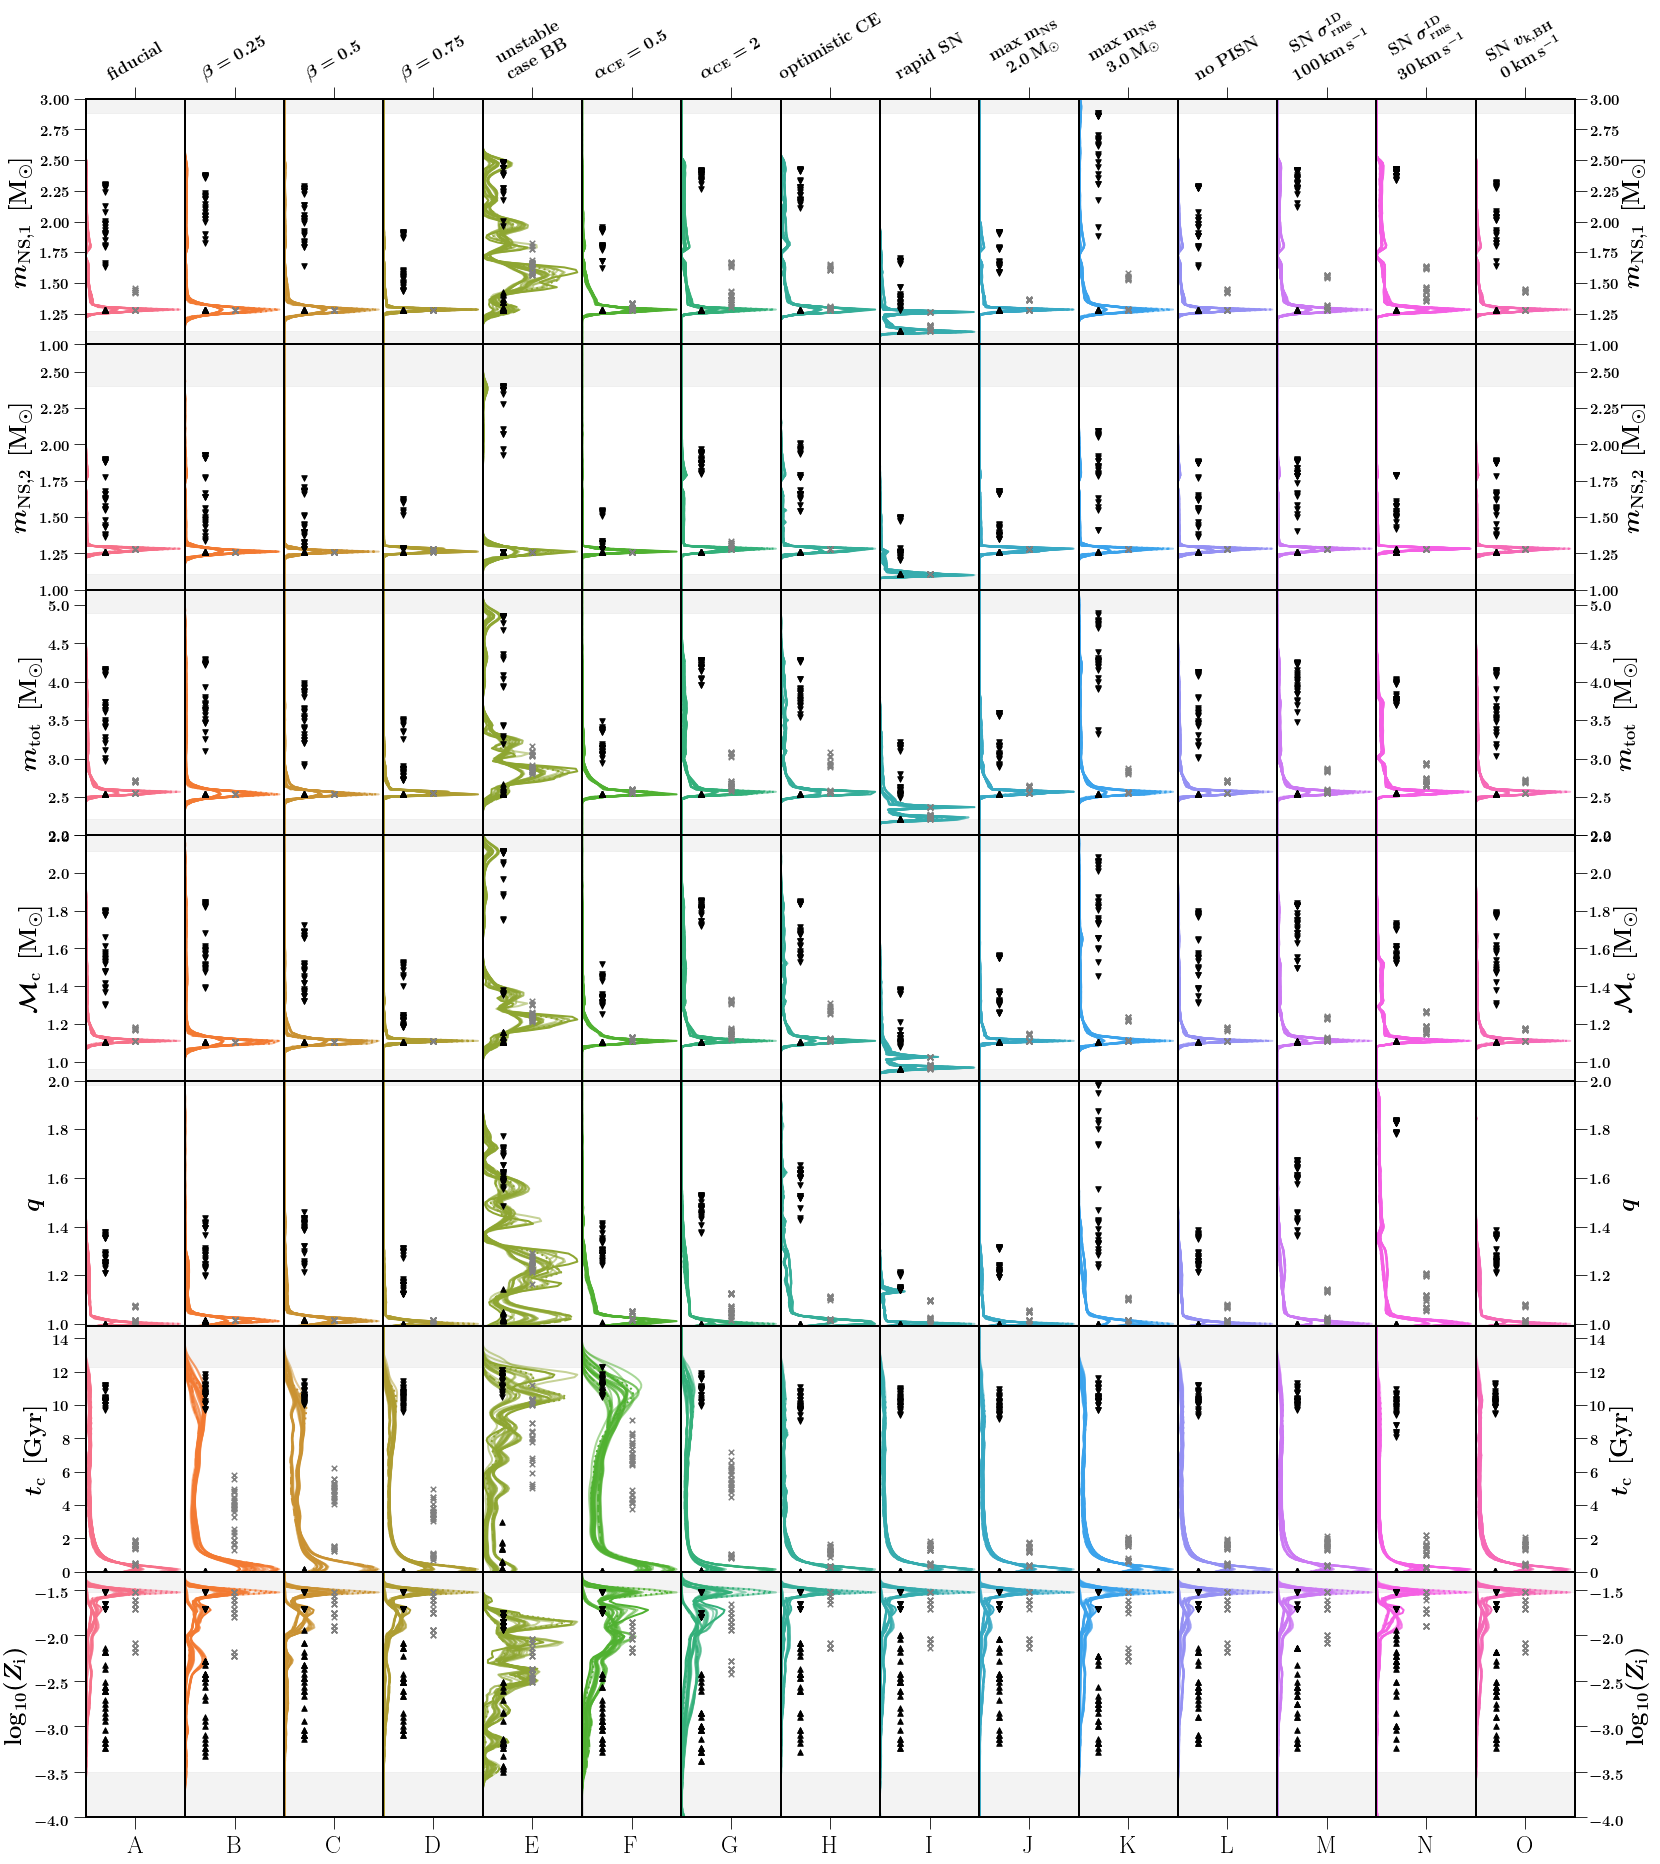

In [149]:

ncols, nrows= 15,7
f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(23,26), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})



# ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']



# for ind_bps, BPS in enumerate(['A']):#, 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']):
Zsolar=0.0142
nModels=15
BPSnameslist = list(string.ascii_uppercase)[0:nModels]
MSSFRalphas = [1., 0.5, 0.5, 0.5]
MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']

#     MSSFRnameslist = ['000', '231', '312']
MSSFRnameslist = ['000', '111', '211', '311', '112', '212', '312', '113', '213', '313', '121', '221', '321', '122', '222', '322', '123', '223', '323', '131', '231', '331', '132', '232', '332', '133', '233', '333']
# MSSFRnameslist = ['000', '111', '211']
TYPE = 'BNS'
BPSnameslist = list(string.ascii_uppercase)[0:nModels]
BPScolors       = sns.color_palette("husl", len(BPSnameslist))
colorDirDict =  {BPSnameslist[i]: BPScolors[i] for i in range(len(BPSnameslist))}

#     f, ax= plt.subplots(ncols=3,nrows=2,figsize=(20,10))





# Mass BH 



handles, labels = None, None
BPSlist = [BPS]#,'B',  'C', 'D','F', 'G', 'K', 'L' ]
#     whichBPScolor = [BPS]#, 'C', 'D', 'G', 'K', 'L' ]
whichWeight='det'
whichPlot = 'kde'

nameX = r'  a'
nameY = r' $m_{\rm{NS,1}} $ $ \,  [\rm{M}_{\odot}]$'
xparam='MBH'
_,_=makeDistributionPlotManyModelsFlipped(axe_ind=0,xparam=xparam,  BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[1,3], xlabel=nameX, ylabel=nameY, \
                              xlim=[1.,3], ylim=[0.0,1.05], whichWeight=whichWeight, whichPlot=whichPlot)#, whichBPScolor=whichBPScolor) 

nameX = r'$-  $'
nameY = r' $m_{\rm{NS,2}} $ $ \,  [\rm{M}_{\odot}]$'
xparam='MNS'
_,_=makeDistributionPlotManyModelsFlipped(axe_ind=1,xparam=xparam,  BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[1,3], xlabel=nameX, ylabel=nameY, \
                              xlim=[1,2.69], ylim=[0.,1.05], whichWeight=whichWeight, whichPlot=whichPlot)#, whichBPScolor=whichBPScolor)     

#     nameX = r'${\rm{d}}P / {\rm{d}}  m_{\rm{tot}}  $'
nameY = r' $m_{\rm{tot}}$ $ \,  [\rm{M}_{\odot}]$'
xparam='Mtot'
_,_=makeDistributionPlotManyModelsFlipped(axe_ind=2,xparam=xparam,  BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[2,5.3], xlabel=nameX, ylabel=nameY, \
                              xlim=[2,5.1999], ylim=[0.0,1.05], whichWeight=whichWeight, whichPlot=whichPlot)#, whichBPScolor=whichBPScolor) 


#     nameX = r'${\rm{d}}P / {\rm{d}} {M}_{\rm{c}}  $'
nameY = r' $\mathcal{M}_{\rm{c}}$ $ \,  [\rm{M}_{\odot}]$'
xparam='Mchirp'
_,_=makeDistributionPlotManyModelsFlipped(axe_ind=3, xparam=xparam,  BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[0.8, 2.2], xlabel=nameX, ylabel=nameY, \
                              xlim=[0.9,2.199], ylim=[0.001,None],  whichWeight=whichWeight, whichPlot=whichPlot) 


#     nameX = r'${\rm{d}}P / {\rm{d}} q  $'
nameY = r' $q$ $ \, $'
xparam='q'
_,_=makeDistributionPlotManyModelsFlipped(axe_ind=4, xparam=xparam, BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[0.9,2], xlabel=nameX, ylabel=nameY, \
                              xlim=[0.99, 1.999], ylim=[0.001,1.05], whichWeight=whichWeight, whichPlot=whichPlot)     


nameY = r' $t_{\rm{c}}$ $ \, [{\rm{Gyr}}]$'
xparam='tc'
_,_=makeDistributionPlotManyModelsFlipped(axe_ind=5, xparam=xparam, BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[0,15], xlabel=nameX, ylabel=nameY, \
                              xlim=[0,14.72], ylim=[0.001,1.05], whichWeight=whichWeight, whichPlot=whichPlot)      






# #     nameX = r'  $- $ '
#     nameY = r' $(Z_{\rm{i}})$ $ \, $'
#     xparam='Z'
#     xmin = 0.0001
#     xmax = 0.04999
#     _,_=makeDistributionPlotManyModelsFlipped(axe_ind=6,xparam=xparam,  BPSmodelNames=BPSnameslist,\
#             MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[0, 0.05], xlabel=nameX, ylabel=nameY, \
#                                   xlim=[xmin,xmax], ylim=[0.001,None],  whichWeight=whichWeight, whichPlot=whichPlot)
#     nameX = r'  $- $ '
nameY = r' $\log_{10}(Z_{\rm{i}})$ $ \, $'
xparam='logZ'
xmin = np.log10(0.0001)
xmax = np.log10(0.0499)
_,_=makeDistributionPlotManyModelsFlipped(axe_ind=6,xparam=xparam,  BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[xmin-0.5,xmax], xlabel=nameX, ylabel=nameY, \
                              xlim=[xmin,xmax], ylim=[0.001,None],  whichWeight=whichWeight, whichPlot=whichPlot) 


plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)  
plt.savefig('./MakeFigureX_MEGA_kdePlot/' + whichWeight   + TYPE+ '_MEGA_KDE.png', transparent=False)
plt.show()
plt.close()




# 943254
# 986353
#943254
# 986353







# BHNS 

('now at m=', 'A')
MBH
('bw=', 0.04)
1525553
('bandwith for model ', 'A', ' is bw= ', 0.04)
('bw=', 0.05)
738537
('bandwith for model ', 'B', ' is bw= ', 0.05)
('bw=', 0.06)
148043
('bandwith for model ', 'C', ' is bw= ', 0.06)
('bw=', 0.06)
118921
('bandwith for model ', 'D', ' is bw= ', 0.06)
('bw=', 0.06)
458667
('bandwith for model ', 'E', ' is bw= ', 0.06)
('bw=', 0.05)
915179
('bandwith for model ', 'F', ' is bw= ', 0.05)
('bw=', 0.05)
833433
('bandwith for model ', 'G', ' is bw= ', 0.05)
('bw=', 0.04)
1535042
('bandwith for model ', 'H', ' is bw= ', 0.04)
('bw=', 0.03)
2766298
('bandwith for model ', 'I', ' is bw= ', 0.03)
('bw=', 0.05)
959796
('bandwith for model ', 'J', ' is bw= ', 0.05)
('bw=', 0.04)
1990330
('bandwith for model ', 'K', ' is bw= ', 0.04)
('bw=', 0.04)
1524497
('bandwith for model ', 'L', ' is bw= ', 0.04)
('bw=', 0.03)
3049458
('bandwith for model ', 'M', ' is bw= ', 0.03)
('bw=', 0.03)
4198238
('bandwith for model ', 'N', ' is bw= ', 0.03)
('bw=', 0.03)
5068

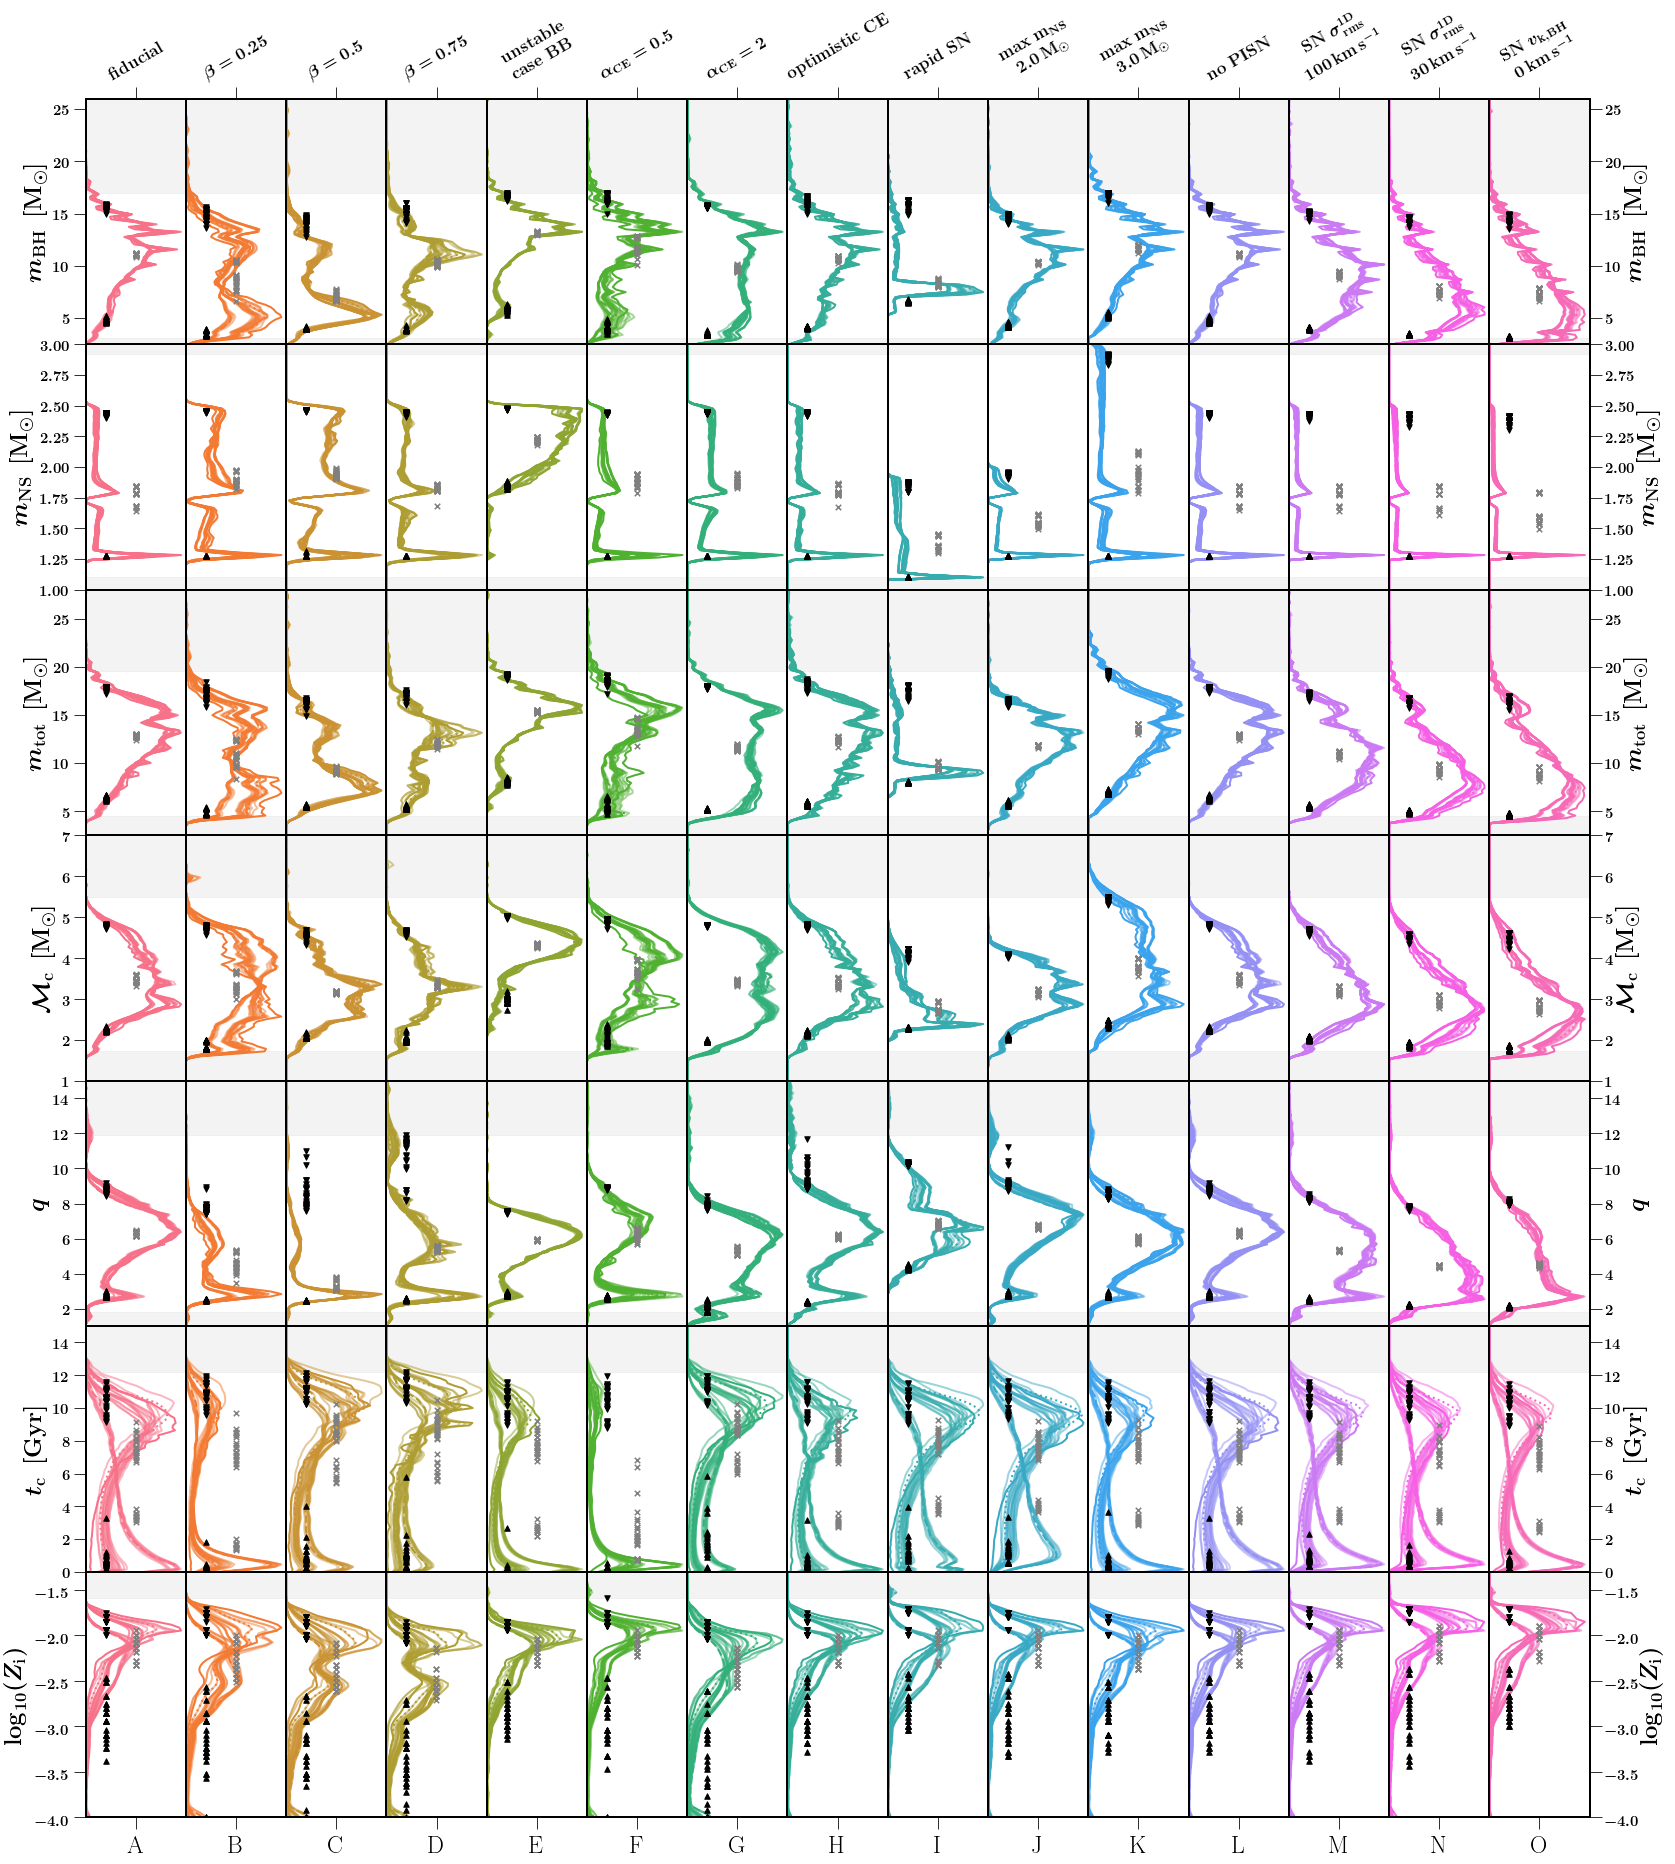

In [150]:

ncols, nrows= 15,7
f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(23,26), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})



# ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']



# for ind_bps, BPS in enumerate(['A']):#, 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']):
Zsolar=0.0142
nModels=15
BPSnameslist = list(string.ascii_uppercase)[0:nModels]
MSSFRalphas = [1., 0.5, 0.5, 0.5]
MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']

#     MSSFRnameslist = ['000', '231', '312']
MSSFRnameslist = ['000', '111', '211', '311', '112', '212', '312', '113', '213', '313', '121', '221', '321', '122', '222', '322', '123', '223', '323', '131', '231', '331', '132', '232', '332', '133', '233', '333']
# MSSFRnameslist = ['000', '111', '211']
TYPE = 'BHNS'
BPSnameslist = list(string.ascii_uppercase)[0:nModels]
BPScolors       = sns.color_palette("husl", len(BPSnameslist))
colorDirDict =  {BPSnameslist[i]: BPScolors[i] for i in range(len(BPSnameslist))}

#     f, ax= plt.subplots(ncols=3,nrows=2,figsize=(20,10))





# Mass BH 



handles, labels = None, None
BPSlist = [BPS]#,'B',  'C', 'D','F', 'G', 'K', 'L' ]
#     whichBPScolor = [BPS]#, 'C', 'D', 'G', 'K', 'L' ]
whichWeight='det'
whichPlot = 'kde'

nameX = r'  a'
nameY = r' $m_{\rm{BH}} $ $ \,  [\rm{M}_{\odot}]$'
xparam='MBH'
_,_=makeDistributionPlotManyModelsFlipped(axe_ind=0,xparam=xparam,  BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[2.2,26], xlabel=nameX, ylabel=nameY, \
                                          xlim=[2.5,25.999], ylim=[0.0,None], whichWeight=whichWeight, whichPlot=whichPlot)#, whichBPScolor=whichBPScolor) 

nameX = r'$-  $'
nameY = r' $m_{\rm{NS}} $ $ \,  [\rm{M}_{\odot}]$'
xparam='MNS'
_,_=makeDistributionPlotManyModelsFlipped(axe_ind=1,xparam=xparam,  BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[1,3], xlabel=nameX, ylabel=nameY, \
                              xlim=[1,3.], ylim=[0.,None], whichWeight=whichWeight, whichPlot=whichPlot)#, whichBPScolor=whichBPScolor)     

#     nameX = r'${\rm{d}}P / {\rm{d}}  m_{\rm{tot}}  $'
nameY = r' $m_{\rm{tot}}$ $ \,  [\rm{M}_{\odot}]$'
xparam='Mtot'
_,_=makeDistributionPlotManyModelsFlipped(axe_ind=2,xparam=xparam,  BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[2.2,28], xlabel=nameX, ylabel=nameY, \
                              xlim=[2.501,27.9999], ylim=[0.0,None], whichWeight=whichWeight, whichPlot=whichPlot)#, whichBPScolor=whichBPScolor) 


#     nameX = r'${\rm{d}}P / {\rm{d}} {M}_{\rm{c}}  $'
nameY = r' $\mathcal{M}_{\rm{c}}$ $ \,  [\rm{M}_{\odot}]$'
xparam='Mchirp'
_,_=makeDistributionPlotManyModelsFlipped(axe_ind=3, xparam=xparam,  BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[1, 7], xlabel=nameX, ylabel=nameY, \
                              xlim=[1.01,6.999], ylim=[0.0,None],  whichWeight=whichWeight, whichPlot=whichPlot) 


#     nameX = r'${\rm{d}}P / {\rm{d}} q  $'
nameY = r' $q$ $ \, $'
xparam='q'
_,_=makeDistributionPlotManyModelsFlipped(axe_ind=4, xparam=xparam, BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[1,15], xlabel=nameX, ylabel=nameY, \
                              xlim=[1.00,14.999], ylim=[0,None], whichWeight=whichWeight, whichPlot=whichPlot)     


nameY = r' $t_{\rm{c}}$ $ \, [{\rm{Gyr}}]$'
xparam='tc'
_,_=makeDistributionPlotManyModelsFlipped(axe_ind=5, xparam=xparam, BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[0,15], xlabel=nameX, ylabel=nameY, \
                              xlim=[0,14.99], ylim=[0,None], whichWeight=whichWeight, whichPlot=whichPlot)      






# #     nameX = r'  $- $ '
#     nameY = r' $(Z_{\rm{i}})$ $ \, $'
#     xparam='Z'
#     xmin = 0.0001
#     xmax = 0.04999
#     _,_=makeDistributionPlotManyModelsFlipped(axe_ind=6,xparam=xparam,  BPSmodelNames=BPSnameslist,\
#             MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[0, 0.05], xlabel=nameX, ylabel=nameY, \
#                                   xlim=[xmin,xmax], ylim=[0.001,None],  whichWeight=whichWeight, whichPlot=whichPlot)
#     nameX = r'  $- $ '
nameY = r' $\log_{10}(Z_{\rm{i}})$ $ \, $'
xparam='logZ'
xmin = np.log10(0.0001)
xmax = np.log10(0.0499)
_,_=makeDistributionPlotManyModelsFlipped(axe_ind=6,xparam=xparam,  BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[xmin-0.5,xmax], xlabel=nameX, ylabel=nameY, \
                              xlim=[xmin,xmax], ylim=[0.001,None],  whichWeight=whichWeight, whichPlot=whichPlot) 


plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)  
plt.savefig('./MakeFigureX_MEGA_kdePlot/' + whichWeight   + TYPE+ '_MEGA_KDE.png', transparent=False)
plt.show()
plt.close()




# 943254
# 986353
#943254
# 986353







('now at m=', 'A')
MBH
('bw=', 0.03)
8371398
('bandwith for model ', 'A', ' is bw= ', 0.03)
('bw=', 0.03)
8616008
('bandwith for model ', 'B', ' is bw= ', 0.03)
('bw=', 0.03)
6568454
('bandwith for model ', 'C', ' is bw= ', 0.03)
('bw=', 0.03)
6033721
('bandwith for model ', 'D', ' is bw= ', 0.03)
('bw=', 0.03)
9274636
('bandwith for model ', 'E', ' is bw= ', 0.03)
('bw=', 0.03)
7958497
('bandwith for model ', 'F', ' is bw= ', 0.03)
('bw=', 0.03)
6212236
('bandwith for model ', 'G', ' is bw= ', 0.03)
('bw=', 0.03)
8782290
('bandwith for model ', 'H', ' is bw= ', 0.03)
('bw=', 0.03)
7463923
('bandwith for model ', 'I', ' is bw= ', 0.03)
('bw=', 0.03)
8879317
('bandwith for model ', 'J', ' is bw= ', 0.03)
('bw=', 0.03)
7906131
('bandwith for model ', 'K', ' is bw= ', 0.03)
('bw=', 0.03)
8547080
('bandwith for model ', 'L', ' is bw= ', 0.03)
('bw=', 0.03)
8106172
('bandwith for model ', 'M', ' is bw= ', 0.03)
('bw=', 0.03)
7609741
('bandwith for model ', 'N', ' is bw= ', 0.03)
('bw=', 0.0

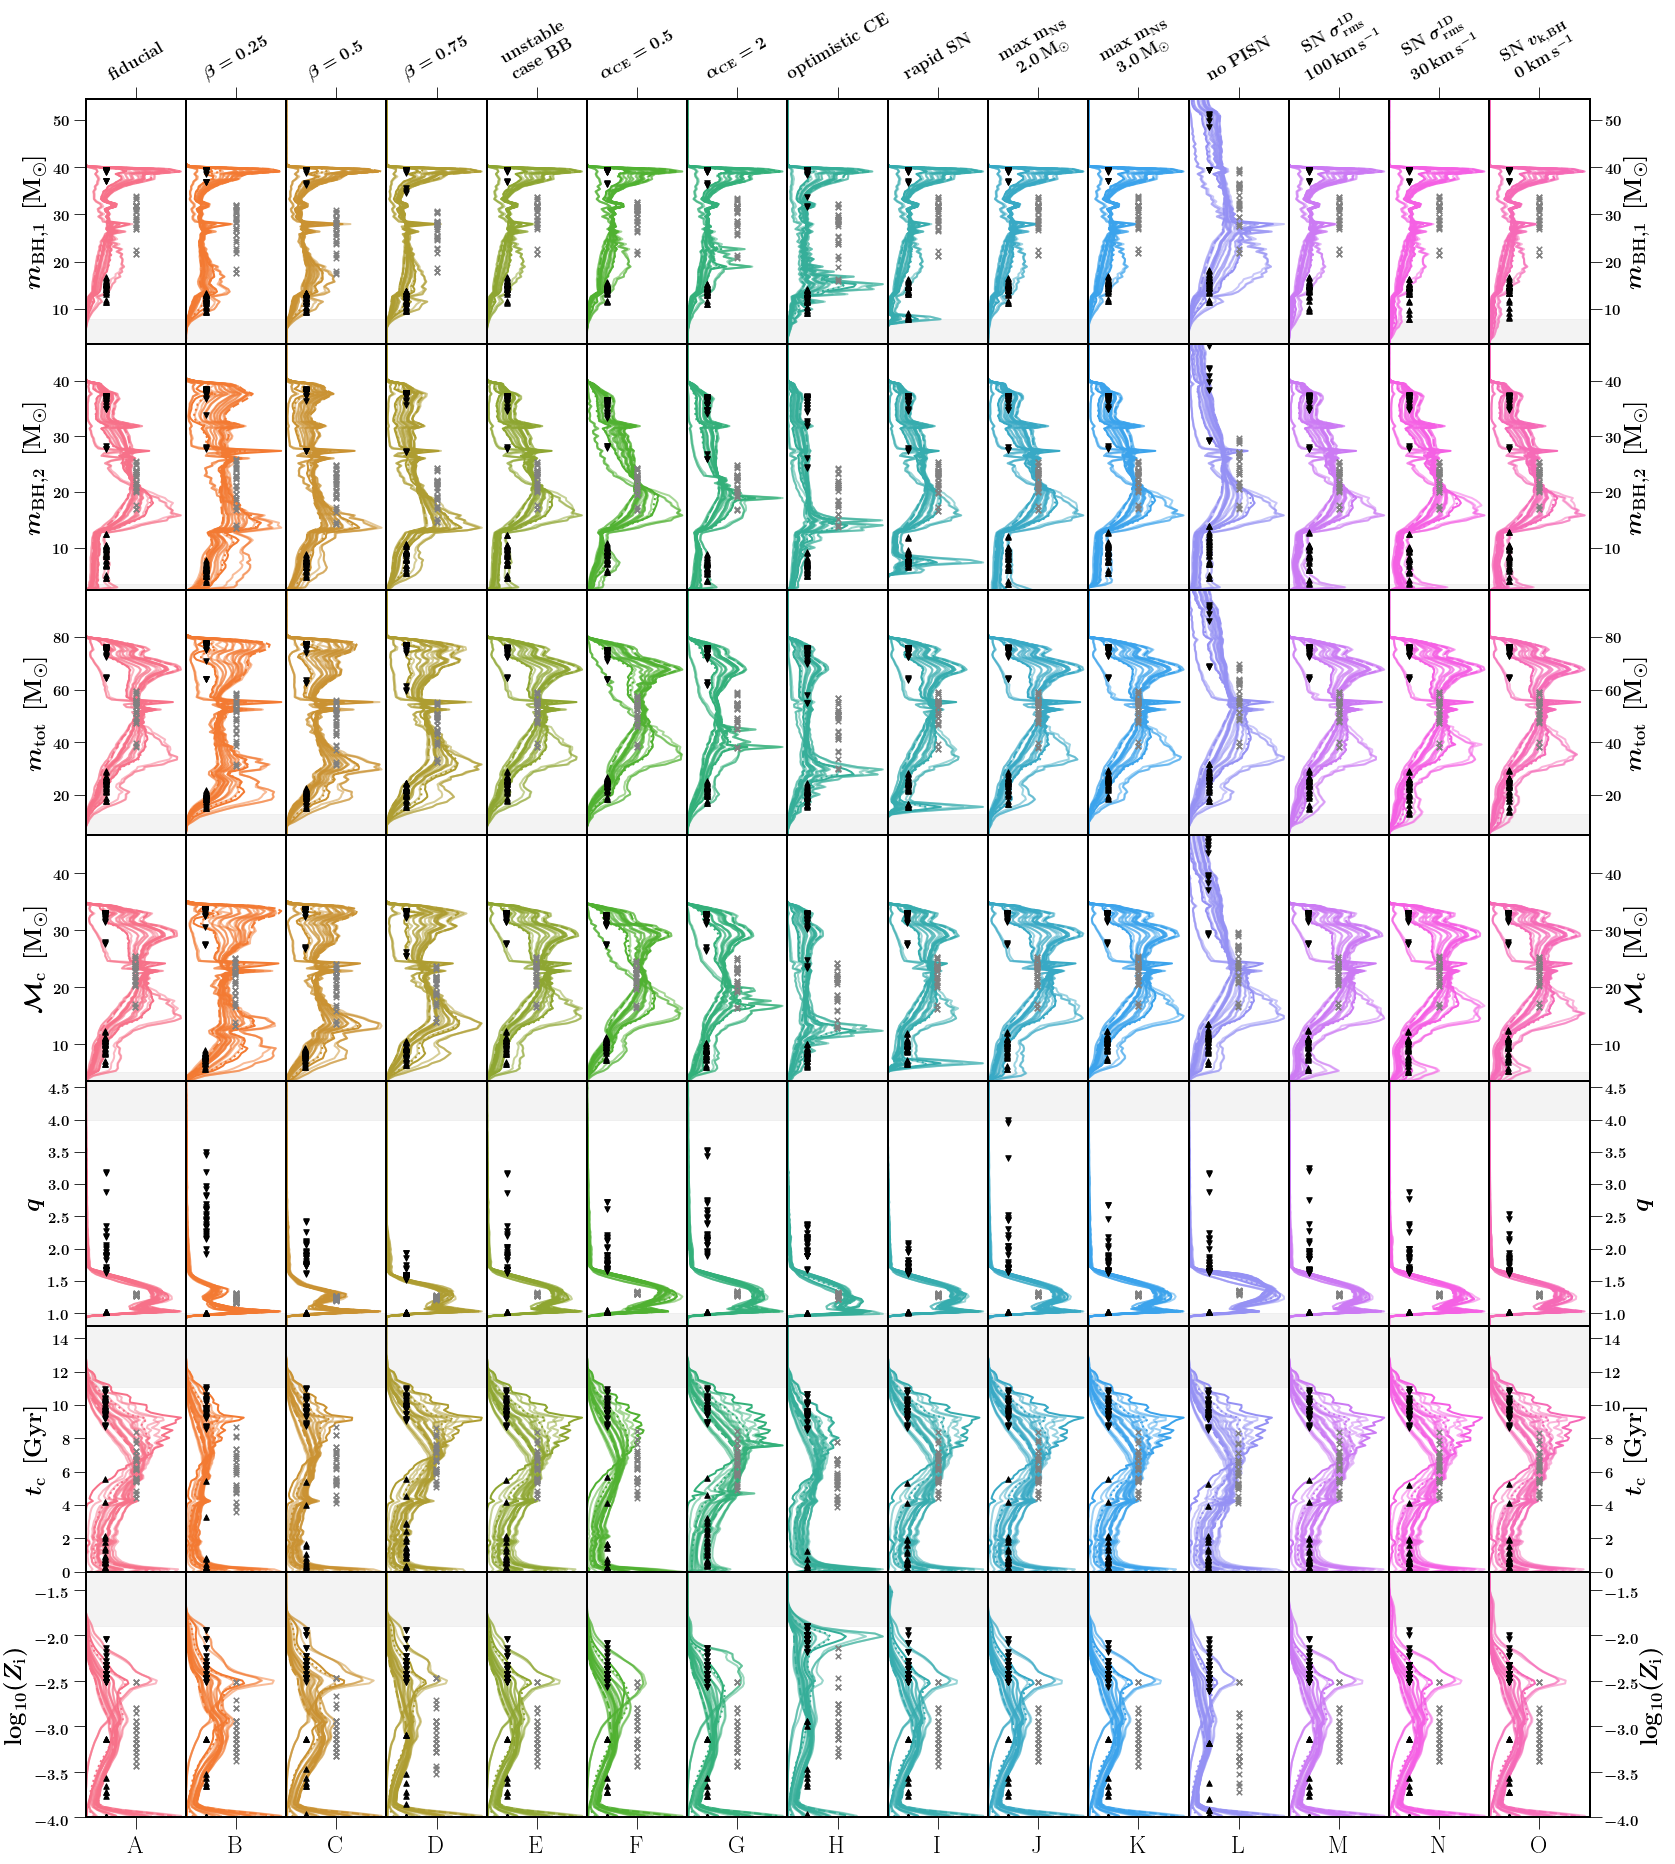

In [154]:

ncols, nrows= 15,7
f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(23,26), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})



# ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']



# for ind_bps, BPS in enumerate(['A']):#, 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']):
Zsolar=0.0142
nModels=15
BPSnameslist = list(string.ascii_uppercase)[0:nModels]
MSSFRalphas = [1., 0.5, 0.5, 0.5]
MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']

#     MSSFRnameslist = ['000', '231', '312']
MSSFRnameslist = ['000', '111', '211', '311', '112', '212', '312', '113', '213', '313', '121', '221', '321', '122', '222', '322', '123', '223', '323', '131', '231', '331', '132', '232', '332', '133', '233', '333']
# MSSFRnameslist = ['000', '111', '211']
TYPE = 'BBH'
BPSnameslist = list(string.ascii_uppercase)[0:nModels]
BPScolors       = sns.color_palette("husl", len(BPSnameslist))
colorDirDict =  {BPSnameslist[i]: BPScolors[i] for i in range(len(BPSnameslist))}

#     f, ax= plt.subplots(ncols=3,nrows=2,figsize=(20,10))





# Mass BH 



handles, labels = None, None
BPSlist = [BPS]#,'B',  'C', 'D','F', 'G', 'K', 'L' ]
#     whichBPScolor = [BPS]#, 'C', 'D', 'G', 'K', 'L' ]
whichWeight='det'
whichPlot = 'kde'

nameX = r'  a'
nameY = r' $m_{\rm{BH,1}} $ $ \,  [\rm{M}_{\odot}]$'
xparam='MBH'
_,_=makeDistributionPlotManyModelsFlipped(axe_ind=0,xparam=xparam,  BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[2.5,55], xlabel=nameX, ylabel=nameY, \
                              xlim=[2.5,54.5], ylim=[0.0,1.05], whichWeight=whichWeight, whichPlot=whichPlot)#, whichBPScolor=whichBPScolor) 

nameX = r'$-  $'
nameY = r' $m_{\rm{BH,2}} $ $ \,  [\rm{M}_{\odot}]$'
xparam='MNS'
_,_=makeDistributionPlotManyModelsFlipped(axe_ind=1,xparam=xparam,  BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[2.5,46.5], xlabel=nameX, ylabel=nameY, \
                              xlim=[2.5,46.5], ylim=[0.,1.05], whichWeight=whichWeight, whichPlot=whichPlot)#, whichBPScolor=whichBPScolor)     

#     nameX = r'${\rm{d}}P / {\rm{d}}  m_{\rm{tot}}  $'
nameY = r' $m_{\rm{tot}}$ $ \,  [\rm{M}_{\odot}]$'
xparam='Mtot'
_,_=makeDistributionPlotManyModelsFlipped(axe_ind=2,xparam=xparam,  BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[4.,98], xlabel=nameX, ylabel=nameY, \
                              xlim=[4.6,98], ylim=[0.0,1.05], whichWeight=whichWeight, whichPlot=whichPlot)#, whichBPScolor=whichBPScolor) 


#     nameX = r'${\rm{d}}P / {\rm{d}} {M}_{\rm{c}}  $'
nameY = r' $\mathcal{M}_{\rm{c}}$ $ \,  [\rm{M}_{\odot}]$'
xparam='Mchirp'
_,_=makeDistributionPlotManyModelsFlipped(axe_ind=3, xparam=xparam,  BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[3.6, 47], xlabel=nameX, ylabel=nameY, \
                              xlim=[3.6,46.7], ylim=[0.001,None],  whichWeight=whichWeight, whichPlot=whichPlot) 


#     nameX = r'${\rm{d}}P / {\rm{d}} q  $'
nameY = r' $q$ $ \, $'
xparam='q'
_,_=makeDistributionPlotManyModelsFlipped(axe_ind=4, xparam=xparam, BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[0.8,4.6], xlabel=nameX, ylabel=nameY, \
                              xlim=[0.8, 4.6], ylim=[0.001,1.05], whichWeight=whichWeight, whichPlot=whichPlot)     


nameY = r' $t_{\rm{c}}$ $ \, [{\rm{Gyr}}]$'
xparam='tc'
_,_=makeDistributionPlotManyModelsFlipped(axe_ind=5, xparam=xparam, BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[0,15], xlabel=nameX, ylabel=nameY, \
                              xlim=[0,14.72], ylim=[0.001,1.05], whichWeight=whichWeight, whichPlot=whichPlot)      






# #     nameX = r'  $- $ '
#     nameY = r' $(Z_{\rm{i}})$ $ \, $'
#     xparam='Z'
#     xmin = 0.0001
#     xmax = 0.04999
#     _,_=makeDistributionPlotManyModelsFlipped(axe_ind=6,xparam=xparam,  BPSmodelNames=BPSnameslist,\
#             MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[0, 0.05], xlabel=nameX, ylabel=nameY, \
#                                   xlim=[xmin,xmax], ylim=[0.001,None],  whichWeight=whichWeight, whichPlot=whichPlot)
#     nameX = r'  $- $ '
nameY = r' $\log_{10}(Z_{\rm{i}})$ $ \, $'
xparam='logZ'
xmin = np.log10(0.0001)
xmax = np.log10(0.0499)
_,_=makeDistributionPlotManyModelsFlipped(axe_ind=6,xparam=xparam,  BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[xmin-0.5,xmax], xlabel=nameX, ylabel=nameY, \
                              xlim=[xmin,xmax], ylim=[0.001,None],  whichWeight=whichWeight, whichPlot=whichPlot) 


plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)  
plt.savefig('./MakeFigureX_MEGA_kdePlot/' + whichWeight   + TYPE+ '_MEGA_KDE.png', transparent=False)
plt.show()
plt.close()




# 943254
# 986353
#943254
# 986353







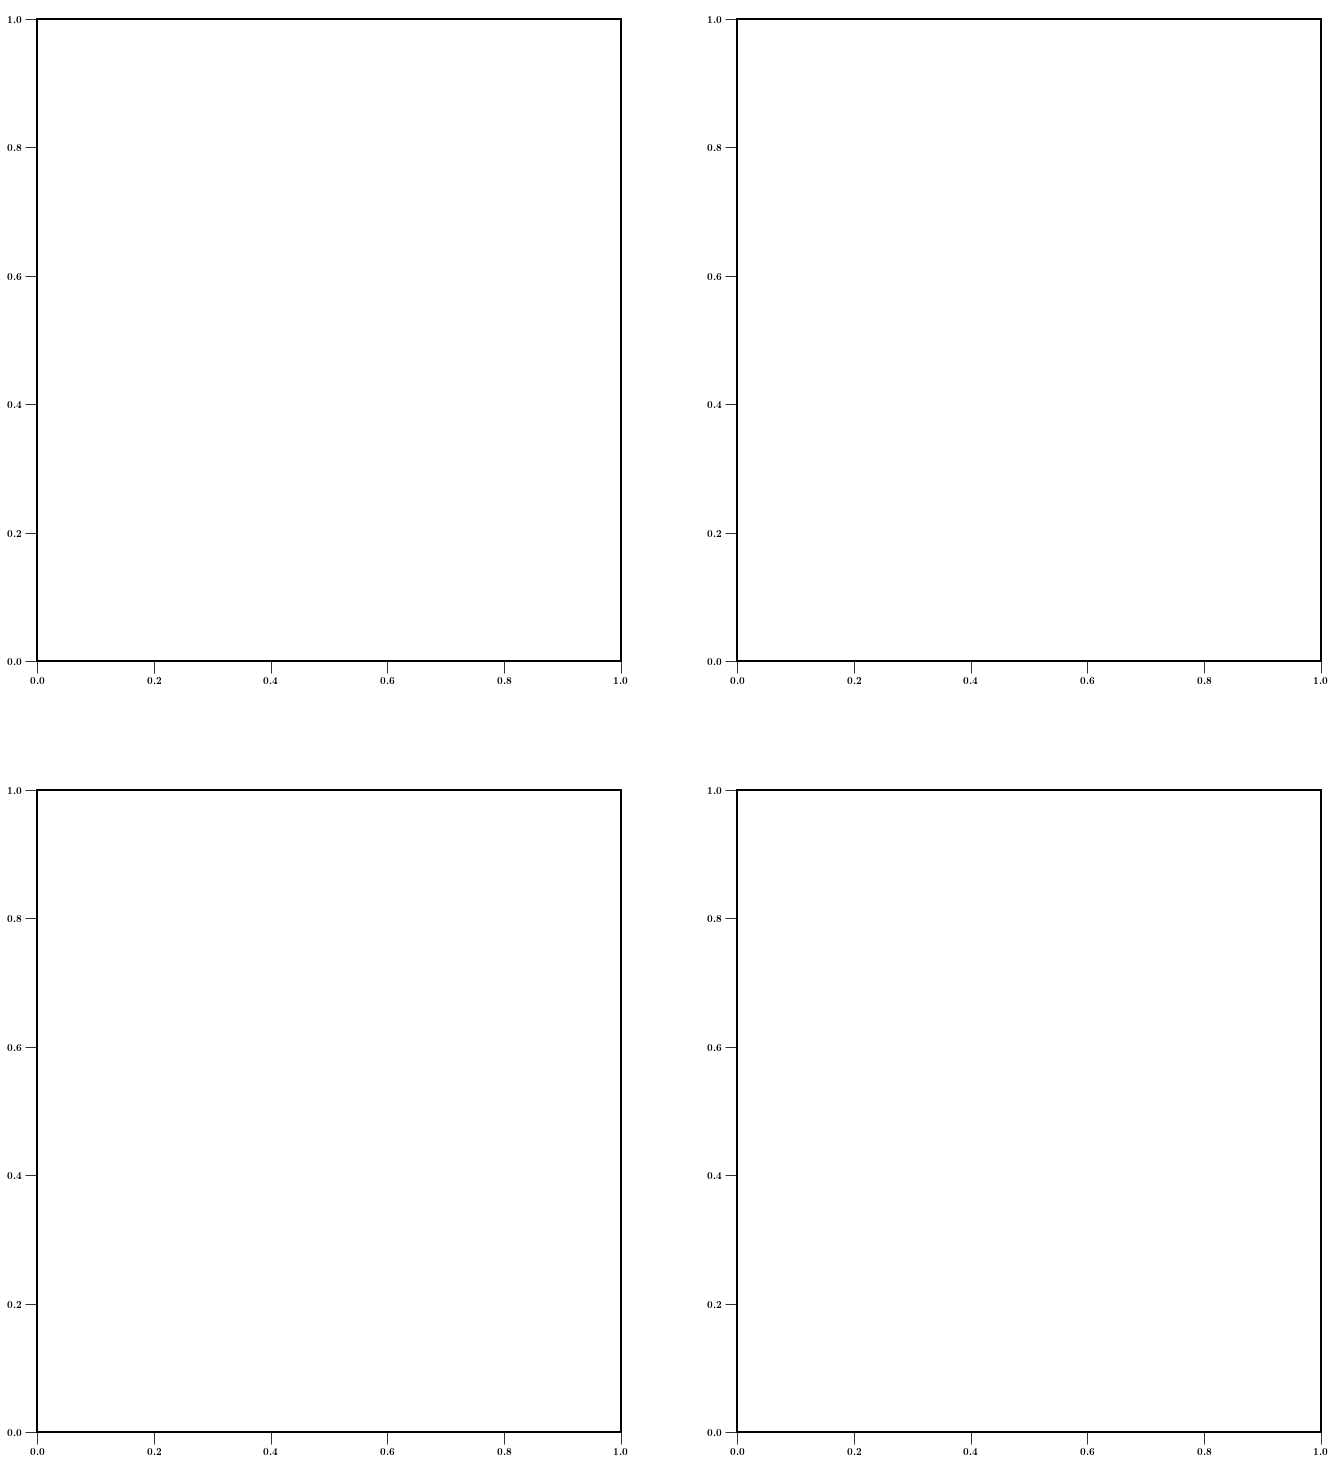

In [145]:
ncols, nrows= 2,2
f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(23,26), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


plt.show()